<a href="https://colab.research.google.com/github/IanPol0/DataScienceNetflix/blob/main/DataScienceNetflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Trabajo Práctico Netflix**
Septiembre 2022

##Import

In [131]:
#Instalamos Cinemagoer
!pip install git+https://github.com/cinemagoer/cinemagoer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cinemagoer/cinemagoer to /tmp/pip-req-build-kn85oddi
  Running command git clone -q https://github.com/cinemagoer/cinemagoer /tmp/pip-req-build-kn85oddi


In [132]:
#Importamos todas las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz
import numpy as np
from imdb import Cinemagoer
from PIL import Image
import requests
from io import BytesIO

In [133]:
#Guardamos el df en la variable history
url='https://raw.githubusercontent.com/IanPol0/DataScienceNetflix/main/NetflixHistory.csv'
history = pd.read_csv(url)

##Delete devices not required

In [134]:
#Declaramos una lista con todos los dispositivos no requeridos
devices_remove = ['Sony PS4', 'Netflix Windows App - Cadmium Windows Mobile', 
'Apple iPhone 6s', 'Apple iPhone 7 Plus (CDMA)', 'Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV', 
'iPhone 5S GSM', 'Google Chromecast V3 Streaming Stick']

#Borramos las filas con esos dispositivos del df
for device in devices_remove:
  history = history.drop(history.index[history['Device Type'] == device], inplace=False)
  history = history.reset_index(drop=True)

##Adapt time

In [135]:
#Funcion que a base de un str en formato (ejemplo): 02:30:45, devuelve el tiempo en segundos
def toSeconds(time_str):
  h, m, s = time_str.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

#Funcion que a base de un str en el mismo formato que la anterior, devuelve el tiempo en dias
def toDays(time_str):
  h, m, s = time_str.split(":")
  return (int(h) + (int(m) / 60) + (int(s) / 3600) ) / 24

##Divide series and movies

In [137]:
identificator = []

#Agregamos una columna al df que indica si el titulo de la fila es una serie o pelicula
#esto lo hacemos comprobando si en el titulo dice temporada, capitulo, season, clip,
#resumen, trailer, series. En el caso que no contenga ninguno, se considera pelicula

for i in range(len(history['Title'])):
  if history['Title'][i].__contains__('Temporada'):
    identificator.append('serie')
  elif history['Title'][i].__contains__('Capítulo'): 
    identificator.append('serie')
  elif history['Title'][i].__contains__('Season'): 
    identificator.append('serie')
  elif history['Title'][i].__contains__('Clip'): 
    identificator.append('serie')
  elif history['Title'][i].__contains__('Resumen'): 
    identificator.append('serie')
  elif history['Title'][i].__contains__('Tráiler'): 
    identificator.append('serie')
  elif history['Title'][i].__contains__('Series'): 
    identificator.append('serie')
  else:
    identificator.append('movie')

#Guardamos la columna creada anteriormente en la lista identificator

history['Type'] = identificator

In [138]:
#A base de la columna creada anteriormente, cramos dos df ditintos,
#uno con las series y otro con las peliculas. Tambien borramos la
#columna que hicimos en la celda anterior
series = history[history['Type'] == 'serie']
movies = history[history['Type'] == 'movie']
del history['Type'], series['Type'], movies['Type']
series = series.reset_index()
movies = movies.reset_index()

##Exercises

###a) Contabilizar el dispositivo con el que más títulos se reprodujeron.

In [139]:
#Creamos una diccionario donde la key sera el nombre del dispositivo y la
#value sera cuantos titulos se reprodujeron en ese dispositivo
devices_compare = {}

#Iteramos la columna ['Device Type'] del df con dev
for dev in history['Device Type']: 
  #Si el dispositivo no esta en el diccionario, lo agregamos con una reproduccion
  if dev not in devices_compare: 
    devices_compare[dev] = 1
  #Si el dispositivo si esta en el diccionario, sumamos una reproduccion
  else:
    devices_compare[dev] += 1

#Buscamos la key del dispositivo con la mayor value
max(devices_compare, key=devices_compare.get)

'Apple Apple TV 4 Apple TV'

###b) Encontrar la película con más ocurrencias y la película con mayor duración total.

In [140]:
#Creamos un diccionario donde la key sera el nombre de la pelicula y 
#la value sera cuantas ocurrencias tuvo
movies_compare = {}

#Iteramos la columna ['Title'] del df con mov
for mov in movies['Title']:
  #Si la pelicula no esta en el diccionario, la agregamos con una ocurrencia
  if mov not in movies_compare:
    movies_compare[mov] = 1
  #Si la pelicula si esta en el diccionario, sumamos una ocurrencia  
  else:
    movies_compare[mov] += 1

#Buscamos la key de la pelicula con la mayor value
max(movies_compare, key=movies_compare.get)

'Star Wars: El Imperio contraataca'

In [141]:
#Creamos un diccionario donde la key sera el nombre de la pelicula y 
#la value sera su duracion
movies_duration = {}

#Iteramos las peliculas
for mov in movies.index:
  #Agregamos al diccionaro el nombre de la pelicula y la duracion en segundos
  if movies['Title'][mov] not in movies_duration:
    movies_duration[movies['Title'][mov]] = toSeconds(movies['Duration'][mov])

#Buscamos la key de la pelicula con la mayor value
max(movies_duration, key=movies_duration.get)

'El club de la pelea'

###c) Generar un TOP “N” de series vistas y graficar.

####i) Por tiempo visto.

In [142]:
#ACLARACIÓN: Este ejercicio está pensado desde el lado de qué series fueron 
#más vistas en tiempo total, sumando los segundos.
#Creamos un diccionario donde la key sera el nombre de la serie y la value
#sera cuanto tiempo fue vista
series_duration = {}
name = ''

#Iteramos las series
for ser in series.index:
  #Guardamos solo el nombre original
  name = (series['Title'][ser].split(':'))[0]
  #Si la serie no esta en el diccionario, la agregamos con el tiempo visto
  if name not in series_duration:
    series_duration[name] = toSeconds(series['Duration'][ser])
  #Si la serie si esta en el diccionario, sumamos al tiempo visto
  else:
    series_duration[name] += toSeconds(series['Duration'][ser])

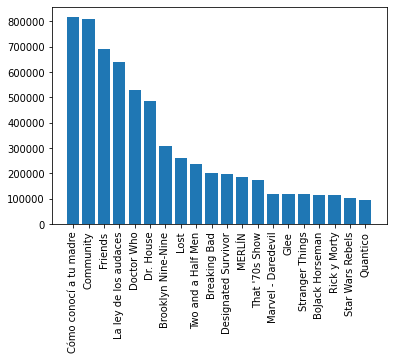

In [143]:
temp, final = {}, {}
temp = series_duration
#Guardamos las series con mas tiempo visto, cada vuelta se borra la mas
#vista para que no se repitan
for i in range(20):
  final[max(temp, key=temp.get)] = temp[max(temp, key=temp.get)]
  temp[max(temp, key=temp.get)] = 0
#Hacemos un grafico de barras de las series guardadas
plt.bar(final.keys(), final.values())
plt.xticks(rotation = 90)
plt.show()

####ii) Por ocurrencias.

In [144]:
#Hacemos lo mismo que en el punto i pero con las ocurrencias
series_occurences = {}
name = ''

for ser in series.index:
  #Guardamos solo el nombre de la serie
  name = (series['Title'][ser].split(':'))[0]
  if name not in series_occurences:
    series_occurences[name] = 1
  else:
    series_occurences[name] += 1

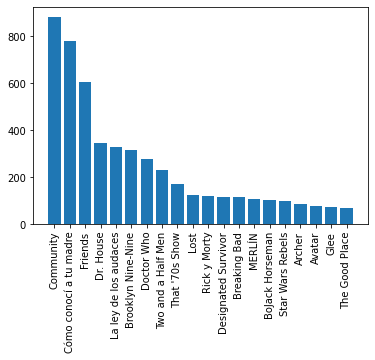

In [145]:
#Graficamos igual que en el punto i
temp2, final2 = {}, {}
temp2 = series_occurences
for i in range(20):
  final2[max(temp2, key=temp2.get)] = temp2[max(temp2, key=temp2.get)]
  temp2[max(temp2, key=temp2.get)] = 0
plt.bar(final2.keys(), final2.values())
plt.xticks(rotation = 90)
plt.show()

###d) Visualizar una semana de reproducciones genérica, en función a las reproducciones por día y por horario de todos los años.

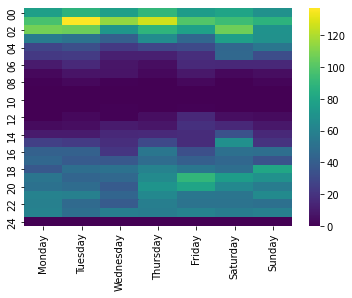

In [146]:
#Creamos una lista con los dias de la semana y otro con las horas
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hours = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']

#Recorriendo la columna del df ['Start Time'] guardamos las horas por dia de 
#la semana durante todos los años en un nuevo df

df = pd.DataFrame(index=hours, columns=week)
for col in df.columns:
    df[col].values[:] = 0

for day in history['Start Time']:
  week_day = (day.split('-'))[0]+ '-' +(day.split('-'))[1]+ '-' +((day.split('-'))[2]).split()[0]
  week_day = datetime.strptime(week_day, "%Y-%m-%d")
  week_day = week[week_day.weekday()]
  hour = ((day.split('-')[2]).split()[1]).split(':')[0]
  df[week_day][hour] += 1

#Graficamos el df
df = df.astype(np.float64)
ax = sns.heatmap(df, cmap='viridis')

###e) Contabilizar la cantidad de títulos vistos por año, graficar su variación a través de los años.

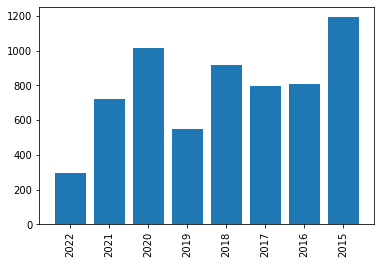

In [147]:
#Creamos un diccionario donde la key va a ser el año y la value
#la cantidad de titulos vistos
titulos_anios = {}
anio = ''

#Con la misma dinamica que en los otros ejercicios guardamos
#los años y la cantidad de titulos
for title in history.index:
  anio = (history['Start Time'][title].split('-'))[0]
  if anio not in titulos_anios:
    titulos_anios[anio] = 1
  else:
    titulos_anios[anio] += 1

#Graficamos el diccionario
plt.bar(titulos_anios.keys(), titulos_anios.values())
plt.xticks(rotation = 90)
plt.show()

##f) Total de días de todos los títulos reproducidos.

In [148]:
#Sumamos todo el tiempo que se vio Netflix y lo pasamos
#a dias con la funcion
days = 0

for i in history["Duration"]:
  days += toDays(i)
print(days)  

99.78094907407396


##Bonus

###1. Identificar cuál fue la película de Star Wars más veces vista por duración.

In [19]:
StarWars_duration = {}
name = ''

for mov in movies.index:
  name = (movies['Title'][mov].split(':'))[0]
  if name == 'Star Wars':
    if movies['Title'][mov] not in StarWars_duration:
      StarWars_duration[movies['Title'][mov]] = toSeconds(movies['Duration'][mov])
    else:
      StarWars_duration[movies['Title'][mov]] += toSeconds(movies['Duration'][mov])

max(StarWars_duration, key=StarWars_duration.get)

'Star Wars: El Imperio contraataca'

###2. Utilizando la API de IMDb (u otra):

####a. Mostrar el póster de las películas más vistas, y de las series.

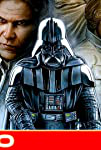

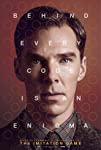

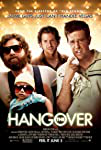

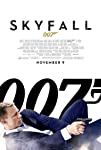

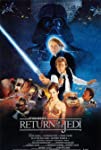

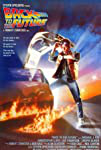

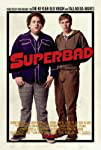

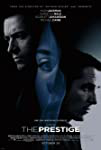

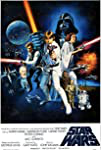

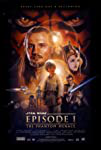

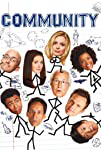

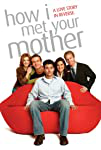

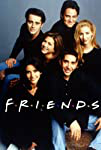

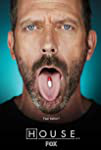

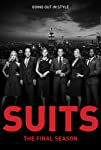

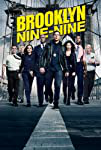

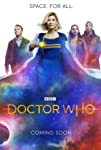

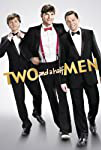

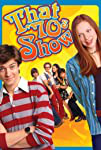

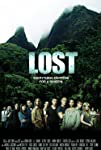

In [122]:
temp = movies_compare
temp2 = series_occurences
ia = Cinemagoer()
images = []

for i in range(10):
  mov = max(temp, key=temp.get)
  movie = mov.split('_')[0]
  movie = ia.search_movie(mov)
  if len(movie)>0:
    id = movie[0].movieID
    response = requests.get(ia.get_movie(id).data['cover url'])
    img = Image.open(BytesIO(response.content))
    images.append(img)
  temp[max(temp, key=temp.get)] = 0

for i in range(10):
  ser = max(temp2, key=temp2.get)
  serie = ser.split('_')[0]
  serie = ia.search_movie(ser)
  if len(serie)>0:
    id = serie[0].movieID
    response = requests.get(ia.get_movie(id).data['cover url'])
    img = Image.open(BytesIO(response.content))
    images.append(img)
  temp2[max(temp2, key=temp2.get)] = 0

for i in range (len(images)):
  display(images[i])